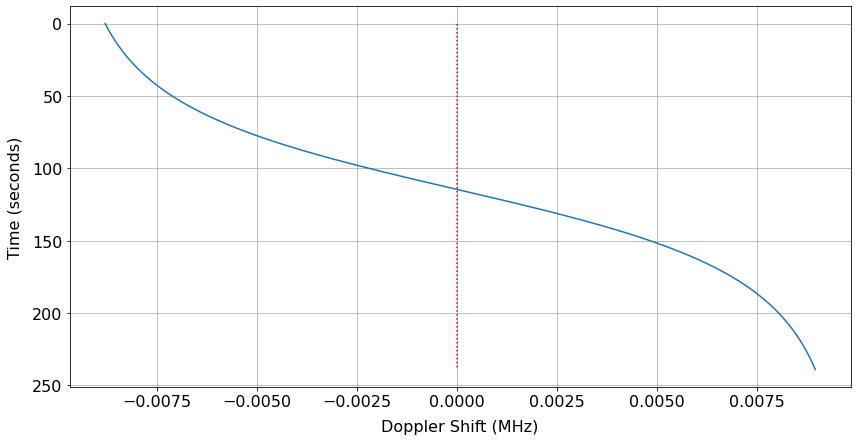

In [16]:
import time
import numpy as np

from astropy.time import Time   # Astropy 4.1rc1 is used

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from orbitdeterminator.doppler.utils.utils import *
from orbitdeterminator.doppler.utils.utils_aux import *
from orbitdeterminator.doppler.utils.utils_vis import *

%matplotlib inline

np.random.seed(100)
np.set_printoptions(precision=2)

x_0, t_sec, x_sat_orbdyn_stm, x_obs_multiple, f_ref = get_example_scenario(id=3, frame='teme')

# Define measurements
r_1, rr_1 = range_range_rate(x_sat_orbdyn_stm, x_obs_multiple[:,:,0])
r_2, rr_2 = range_range_rate(x_sat_orbdyn_stm, x_obs_multiple[:,:,1])
r_3, rr_3 = range_range_rate(x_sat_orbdyn_stm, x_obs_multiple[:,:,2])
z_rr_1 = np.expand_dims(rr_1, axis=0)       # Range rate measurements
_, z_rr_multiple = range_range_rate(x_sat_orbdyn_stm, x_obs_multiple)
z_x_sat = x_sat_orbdyn_stm                  # Full state measurements

#fig1 = plot_example_3d(x_sat_orbdyn_stm, x_obs_multiple)

doppler = doppler_shift(x_sat_orbdyn_stm, x_obs_multiple, f_ref, c=C)

font = {'size': 16}
matplotlib.rc('font', **font)

fig = fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(111)
ax1.set_xlabel("Doppler Shift (MHz)", fontsize=16, labelpad=10)
ax1.set_ylabel("Time (seconds)", fontsize=16, labelpad=10)
ax1.grid(":")

ax1.plot(doppler[0,:], t_sec)
ax1.plot(np.zeros(t_sec.shape), t_sec, color='r', linestyle=':')
ax1.invert_yaxis()
